In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas_profiling import ProfileReport

In [50]:
# Import data
df = pd.read_csv('medical_examination.csv')

In [30]:
df.keys()

Index(['id', 'age', 'sex', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [31]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [32]:
df.describe()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349843,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.477253,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,3.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [7]:
prof = ProfileReport(df)
prof.to_file('medical-data-visualizer.html')

### Add 'overweight' column

In [51]:
height_cuadrado=(df['height']/100)*(df['height']/100)
imc =df['weight']/height_cuadrado
df.loc[imc <= 25, 'overweight'] = 0 
df.loc[imc > 25, 'overweight'] = 1
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0.0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1.0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0.0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1.0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0.0


### Normalize data by making 0 always good and 1 always bad. If the value of 'cholesterol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.


In [52]:
df.loc[df['cholesterol']== 1, 'cholesterol'] = 0 
df.loc[df['cholesterol']> 1, 'cholesterol'] = 1 
df.loc[df['gluc']== 1, 'gluc'] = 0 
df.loc[df['gluc']> 1, 'gluc'] = 1
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0.0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1.0
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0.0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1.0
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0.0


### Draw Categorical Plot

In [53]:
df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol','gluc','smoke','alco','active','overweight'])
df_cat

,cardio,variable,value
0,0,cholesterol,0.0
1,1,cholesterol,1.0
2,1,cholesterol,1.0
3,1,cholesterol,0.0
4,0,cholesterol,0.0
...,...,...,...
419995,0,overweight,1.0
419996,1,overweight,1.0
419997,1,overweight,1.0
419998,1,overweight,1.0


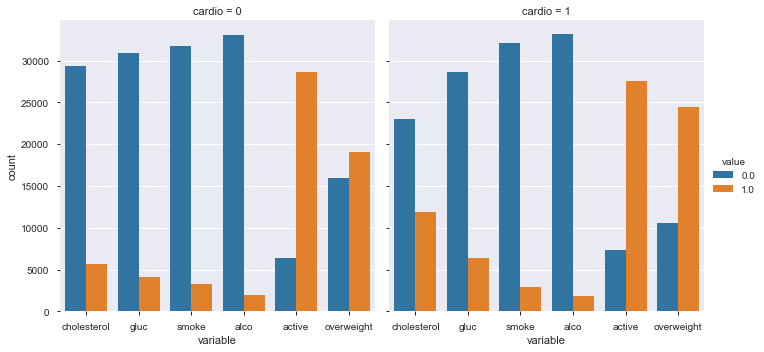

In [56]:
graph=sns.catplot(x='variable',col='cardio',hue='value',kind='count',data=df_cat)

In [58]:
fig = graph.fig
fig.savefig('catplot.png')

In [59]:
def draw_cat_plot():
    # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 
    #'alco', 'active', and 'overweight'.
    df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol','gluc','smoke','alco','active','overweight'])
    # Draw the catplot with 'sns.catplot()'
    graph=sns.catplot(x='variable',col='cardio',hue='value',kind='count',data=df_cat)
    # Get the figure for the output
    fig = graph.fig
    # Do not modify the next two lines
    fig.savefig('catplot.png')
    return fig

### Draw Heat Map
la presión diastólica es más alta que la máxima (Mantén los datos correctos con (df['ap_lo'] <= df['ap_hi']))
la altura es menor que el 2.5º percentil (Mantén los datos correctos con (df['height'] >= df['height'].quantile(0.025)))
la altura es superior al 97,5º percentil
el peso es menor que el 2,5º percentil
el peso es superior al 97,5º percentil

In [64]:
df_heat = f_filtered = df[(df['ap_lo'] <= df['ap_hi']) & (df['height'] >= df['height'].quantile(0.025)) & (df['height'] < df['height'].quantile(0.975)) & (df['weight'] >= df['weight'].quantile(0.025)) & (df['weight'] < df['weight'].quantile(0.975))]
df_heat

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0.0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1.0
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0.0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1.0
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,0.0
69994,99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,1.0
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1.0
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1.0


### Calculate the correlation matrix

In [66]:
corr = df_heat.corr()
corr

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002871,0.003559,0.001012,0.000936,0.002896,0.001142,0.004159,0.002248,-0.001834,-0.000346,0.005777,0.003898,-0.000289
age,0.002871,1.000000,-0.016401,-0.076925,0.071650,0.021188,0.154586,0.130323,0.087694,-0.042193,-0.026728,-0.012165,0.240419,0.089587
sex,0.003559,-0.016401,1.000000,0.495375,0.121413,0.003478,0.059120,-0.037290,-0.021963,0.337618,0.166936,0.008771,0.003424,-0.051556
height,0.001012,-0.076925,0.495375,1.000000,0.240390,0.001840,0.014223,-0.064243,-0.032427,0.183578,0.084086,-0.003750,-0.023961,-0.147883
weight,0.000936,0.071650,0.121413,0.240390,1.000000,0.028190,0.226629,0.134989,0.104897,0.052085,0.056353,-0.013200,0.171317,0.661583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
smoke,-0.001834,-0.042193,0.337618,0.183578,0.052085,-0.001696,0.023740,0.012563,-0.005268,1.000000,0.338451,0.026288,-0.020403,-0.002657
alco,-0.000346,-0.026728,0.166936,0.084086,0.056353,0.001007,0.032205,0.037591,0.013238,0.338451,1.000000,0.026198,-0.011060,0.024930
active,0.005777,-0.012165,0.008771,-0.003750,-0.013200,-0.000969,0.002666,0.002712,-0.010042,0.026288,0.026198,1.000000,-0.036617,-0.003307
cardio,0.003898,0.240419,0.003424,-0.023961,0.171317,0.052045,0.327413,0.203942,0.089089,-0.020403,-0.011060,-0.036617,1.000000,0.143479


### Generate a mask for the upper triangle

In [72]:
mask = np.triu(np.ones_like(corr, dtype=bool))
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False, False,  True,
         

### Set up the matplotlib figure

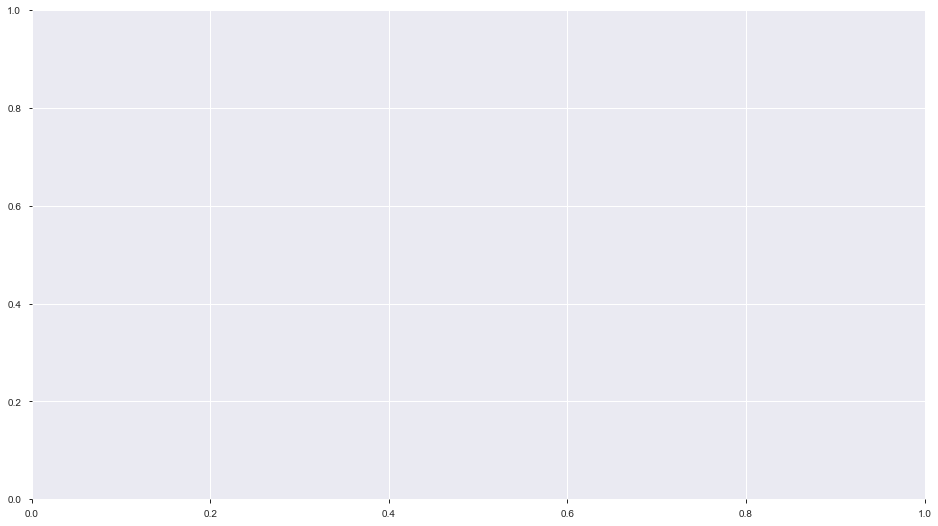

In [74]:
fig,ax = plt.subplots(figsize=(16, 9))

### Draw the heatmap with 'sns.heatmap()'

<AxesSubplot:>

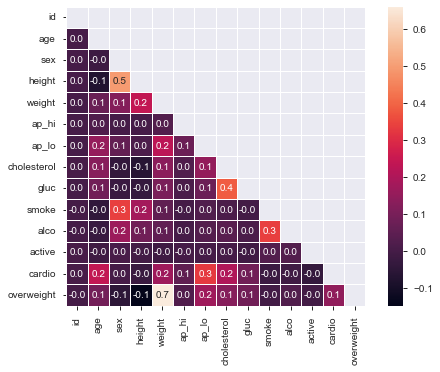

In [75]:
sns.heatmap(corr, mask=mask, square=True, linewidths=0.5, annot=True, fmt="0.1f")

In [77]:
fig.savefig('heatmap.png')

In [ ]:
# Draw Heat Map
def draw_heat_map():
    # Clean the data
    df_heat = None
    # Calculate the correlation matrix
    corr = None
    # Generate a mask for the upper triangle
    mask = None
    # Set up the matplotlib figure
    fig, ax = None
    # Draw the heatmap with 'sns.heatmap()'
    # Do not modify the next two lines
    fig.savefig('heatmap.png')
    return fig


# Test your function by calling it here
draw_cat_plot()
draw_heat_map()